In [1]:
import lifelines
import pandas as pd


In [2]:
#import the csv, probabaly need to use os for working directory
raw_df = pd.read_csv('mod_failure2.csv')
raw_df.head()

,T,E,ExtRange,ser3k,CC,Daz,Dia,EB,Fre,Ker,...,NB,NC,NV,Pen,Sac,SF,SJ,Sie,Stk,Yos
0,110,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,115,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,110,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
T = raw_df['T']
E= raw_df['E']

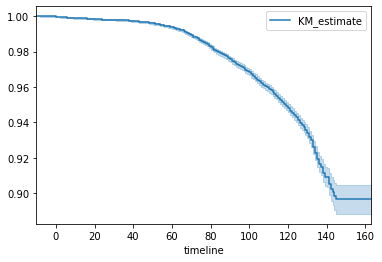

In [4]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(T, event_observed=E)
kmf.plot()

In [6]:
c_df = raw_df.drop('SF', axis=1)
cph = lifelines.CoxPHFitter()
cph.fit(c_df,'T',event_col='E')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 50000 total observations, 47905 right-censored observations>
             duration col = 'T'
                event col = 'E'
   number of observations = 50000
number of events observed = 2095
   partial log-likelihood = -21046.28
         time fit was run = 2019-11-21 02:54:00 UTC

---
           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
ExtRange   1.67       5.32       0.09             1.49             1.85                 4.44                 6.36
ser3k      0.05       1.05       0.19            -0.32             0.41                 0.73                 1.51
CC         0.77       2.15       0.16             0.45             1.08                 1.57                 2.95
Daz        0.07       1.08       0.27            -0.46             0.61                 0.63                 1.84
Dia        0.15       1.16       0.17            -0.19             0.48                 0.83               

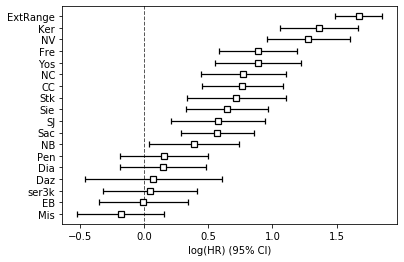

In [7]:
cph.plot()